In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
ds_base=pd.read_csv("Baseball.csv")
ds_base

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


### Attributes Description

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

Output: Number of predicted wins (W)

In [3]:
ds_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


### Summary Statistics

In [4]:
ds_base.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Checking unique values in the Target Variable

In [5]:
ds_base["W"].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

### Checking Value counts for the Target Variable

In [6]:
ds_base["W"].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

### Checking Missing Values

In [7]:
ds_base.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

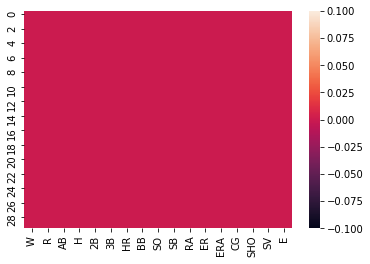

In [8]:
sns.heatmap(ds_base.isnull()) #no null values

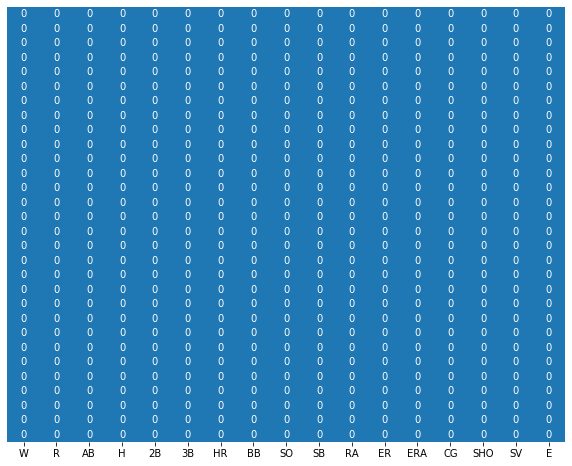

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(ds_base.isnull(),yticklabels=False,cbar=False,cmap="tab10",annot=True)

### Plotting Correlation

In [10]:
ds_base.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


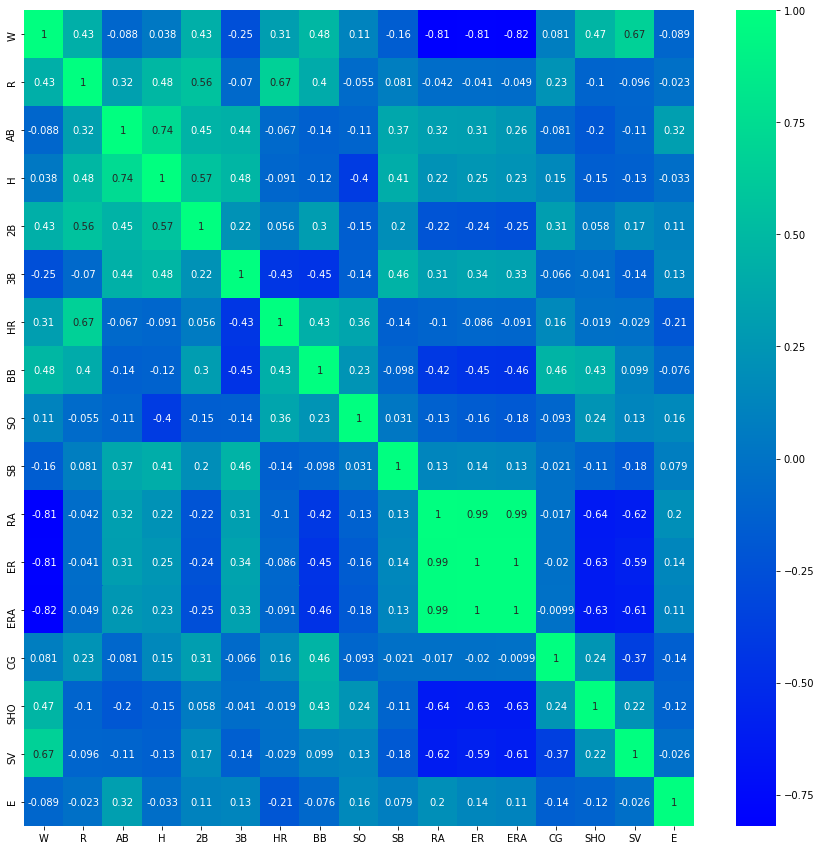

In [11]:
corr_hmap=ds_base.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_hmap,annot=True,cmap="winter")
plt.show()

### Univariate Analysis

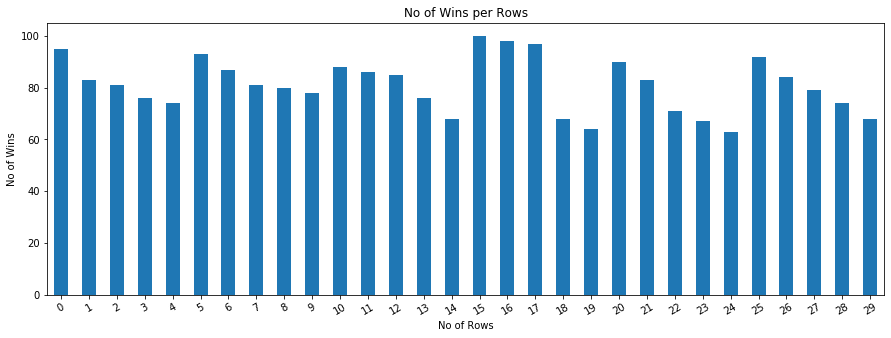

In [12]:
plt.figure(figsize=(15,5))
ds_base["W"].plot.bar()
plt.xlabel("No of Rows")
plt.ylabel("No of Wins")
plt.xticks(rotation=30)
plt.title("No of Wins per Rows")
plt.show()

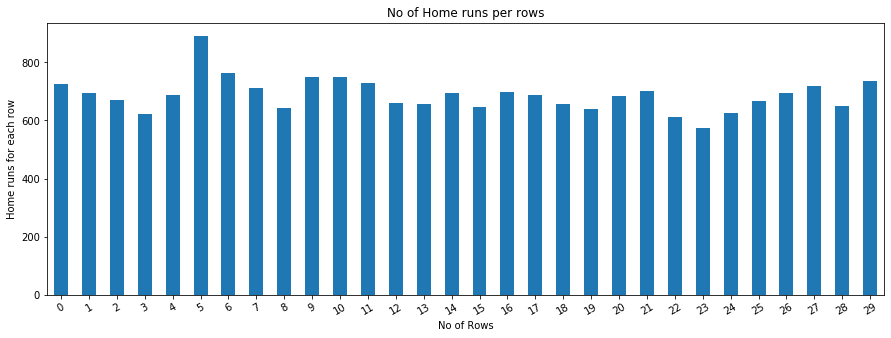

In [13]:
plt.figure(figsize=(15,5))
ds_base["R"].plot.bar()
plt.xlabel("No of Rows")
plt.ylabel("Home runs for each row")
plt.xticks(rotation=30)
plt.title("No of Home runs per rows")
plt.show()

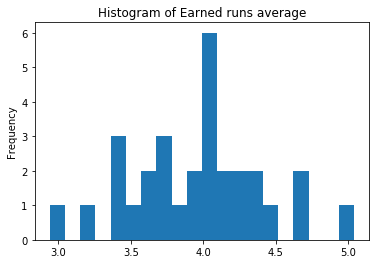

In [14]:
ds_base["ERA"].plot.hist(bins=20)
plt.title("Histogram of Earned runs average")
plt.show()

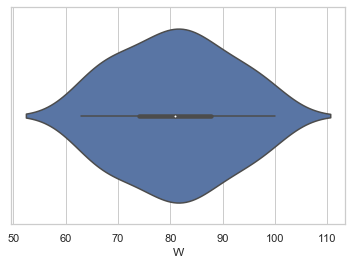

In [15]:
sns.set(style="whitegrid")
sns.violinplot(ds_base["W"])
plt.show()

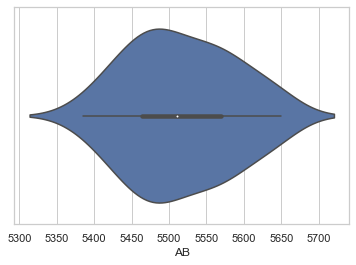

In [16]:
sns.violinplot(ds_base["AB"])
plt.show()

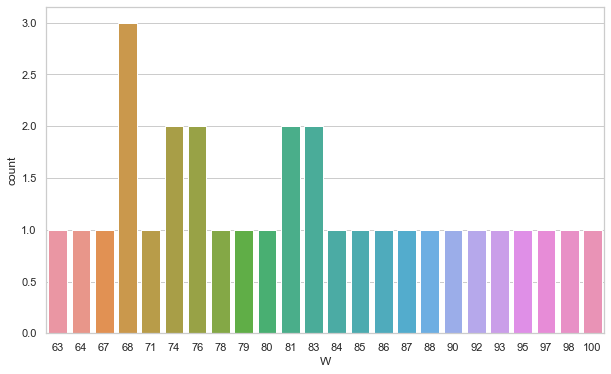

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(ds_base["W"])
plt.show()

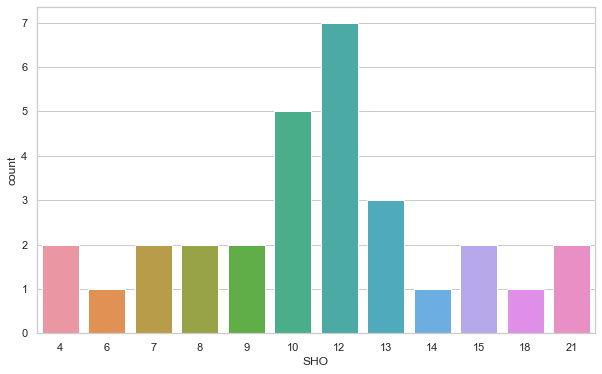

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(ds_base["SHO"])
plt.show()

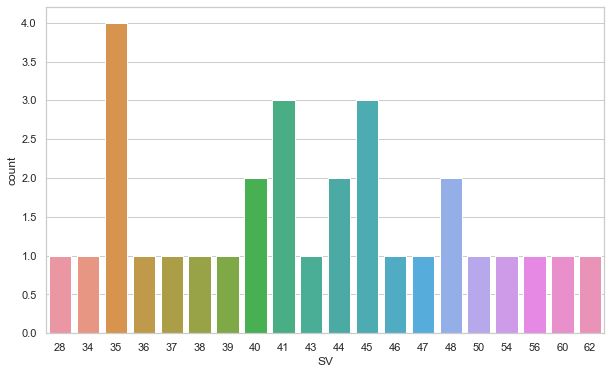

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(ds_base["SV"])
plt.show()

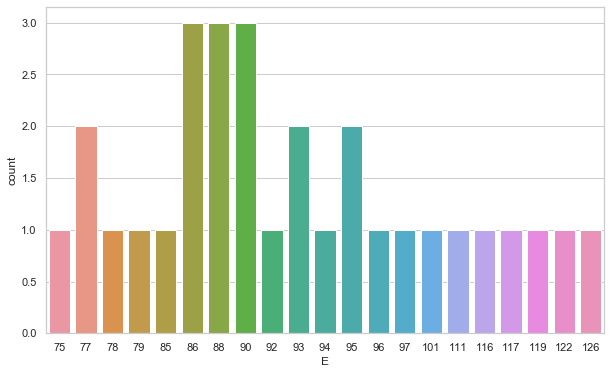

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(ds_base["E"])
plt.show()

### Bivariate Analysis

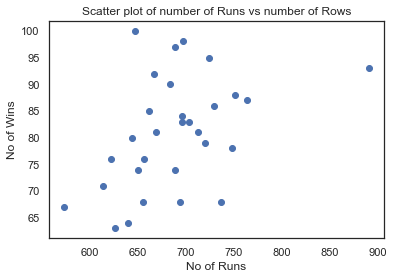

In [21]:
sns.set(style="white")
plt.scatter(ds_base["R"],ds_base["W"])
plt.xlabel("No of Runs")
plt.ylabel("No of Wins")
plt.title("Scatter plot of number of Runs vs number of Rows")
plt.show()

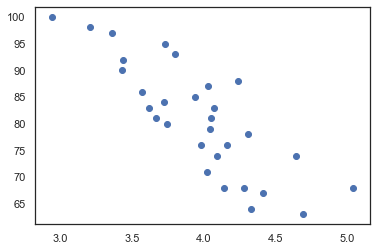

In [22]:
sns.set(style="white")
plt.scatter(ds_base["ERA"],ds_base["W"])

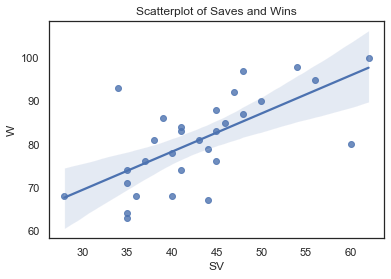

In [23]:
sns.regplot(x="SV",y="W",data=ds_base)
plt.title("Scatterplot of Saves and Wins")
plt.show()

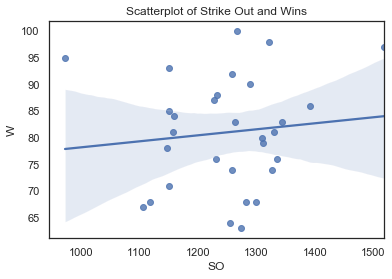

In [24]:
sns.regplot(x="SO",y="W",data=ds_base)
plt.title("Scatterplot of Strike Out and Wins")
plt.show()

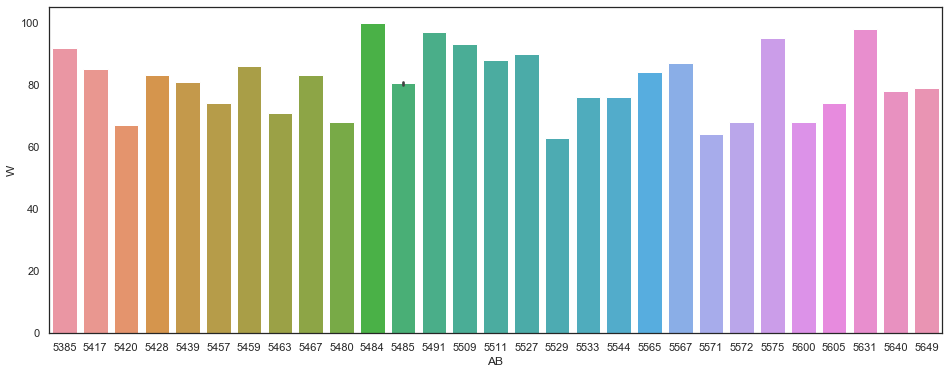

In [25]:
plt.figure(figsize=(16,6))
sns.barplot(x="AB",y="W",data=ds_base)
plt.show()

### Plotting Outliers

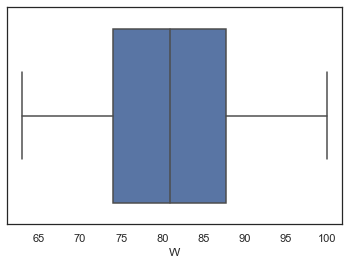

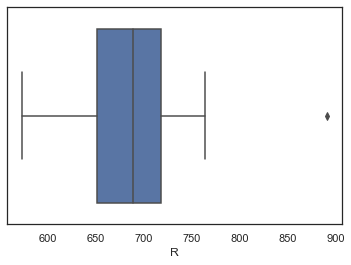

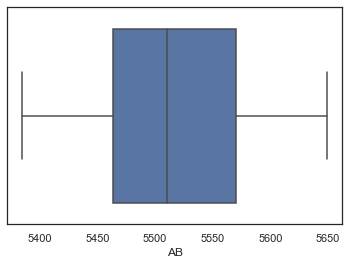

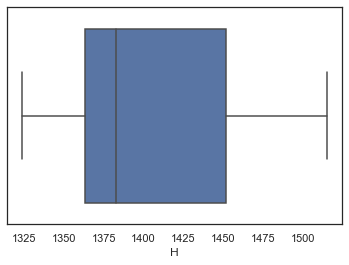

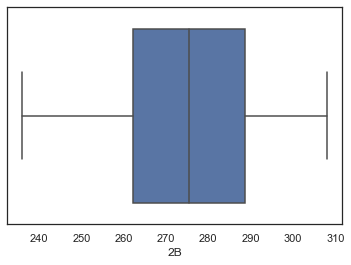

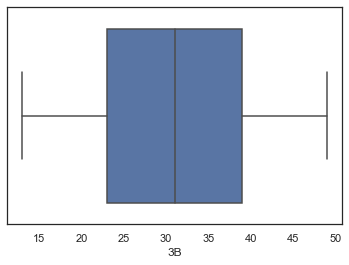

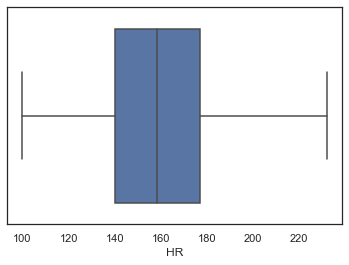

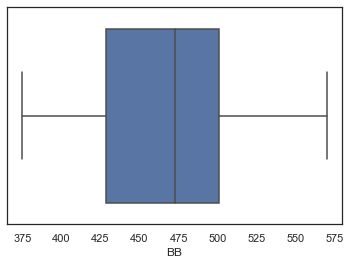

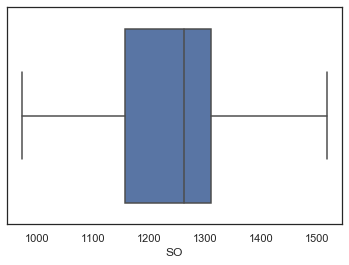

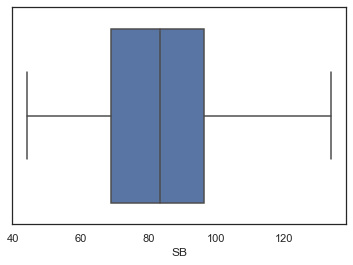

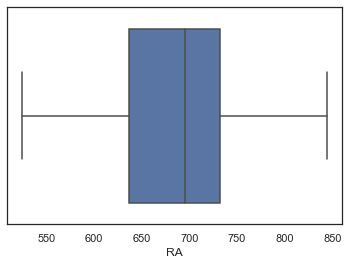

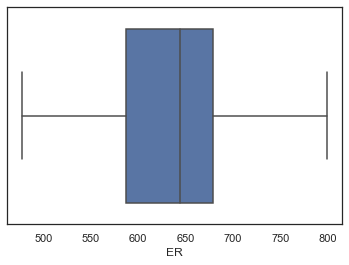

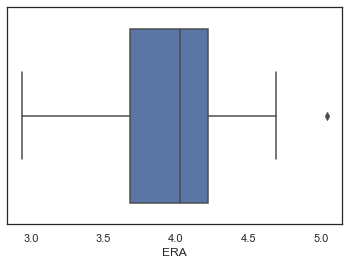

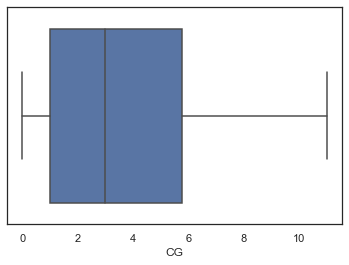

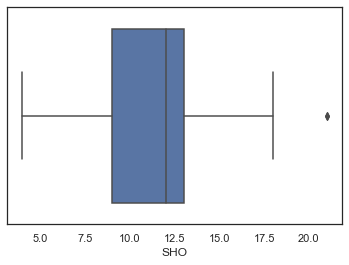

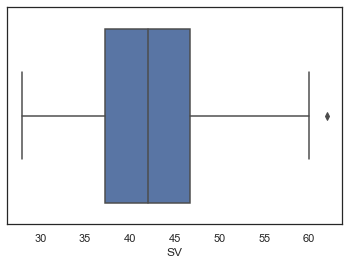

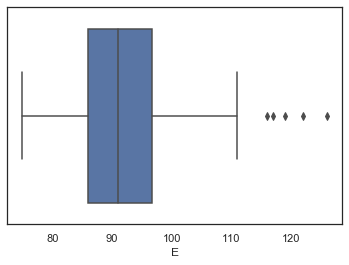

In [26]:
for i in ds_base.columns:
    plt.figure()
    sns.boxplot(ds_base[i])

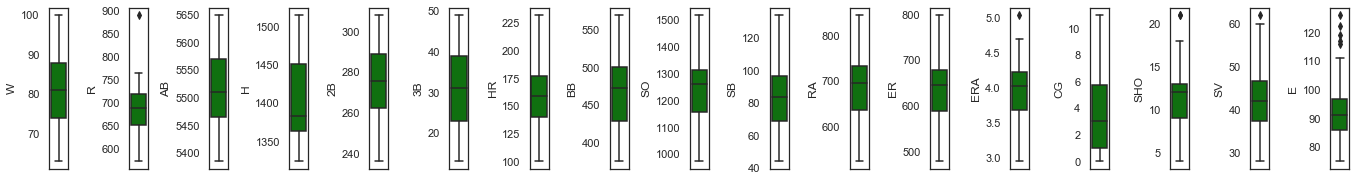

In [27]:
collist=ds_base.columns.values
ncol=17
nrow=10
plt.figure(figsize=(19,25))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(ds_base[collist[i]],color="green",orient="v")
    plt.tight_layout()

### Checking Skewness

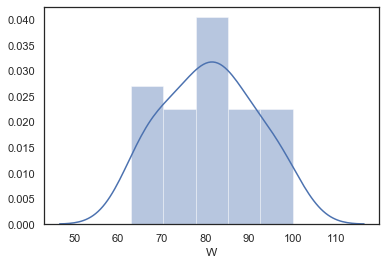

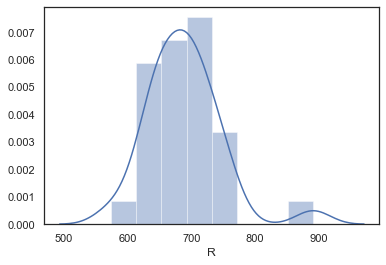

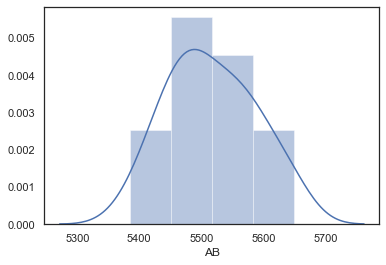

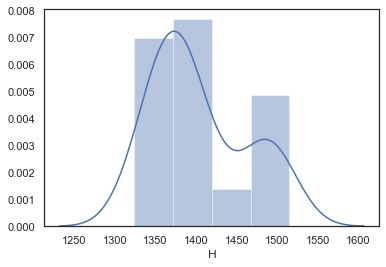

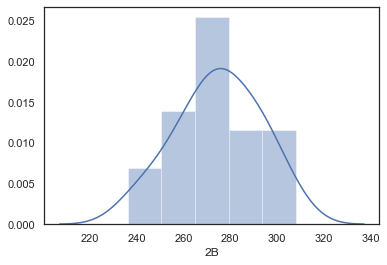

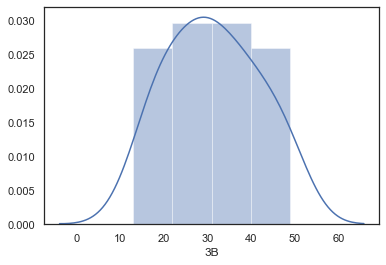

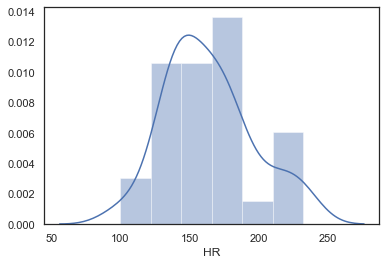

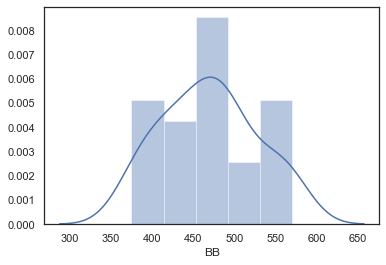

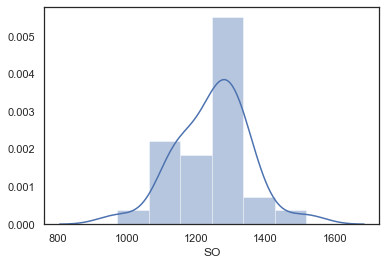

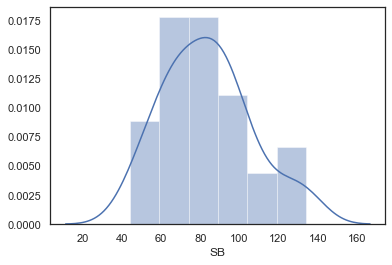

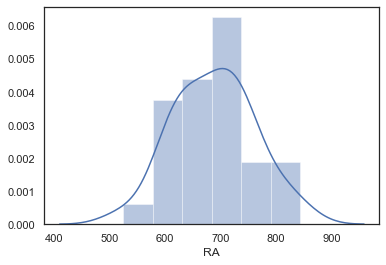

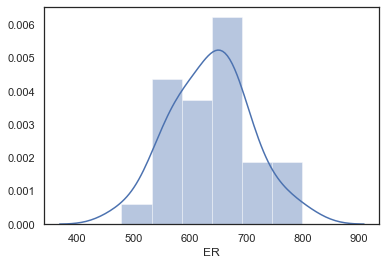

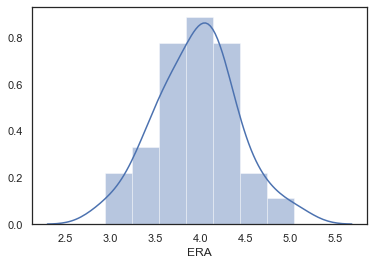

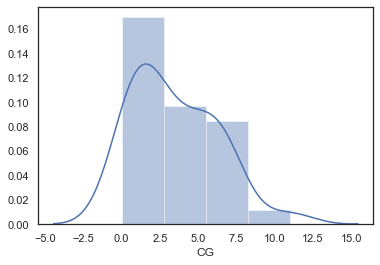

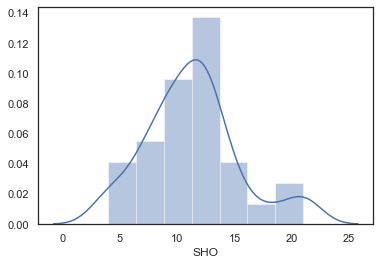

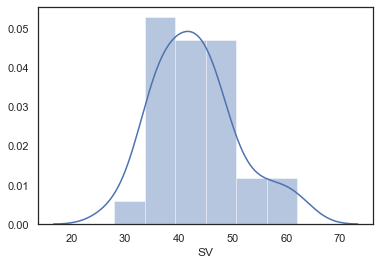

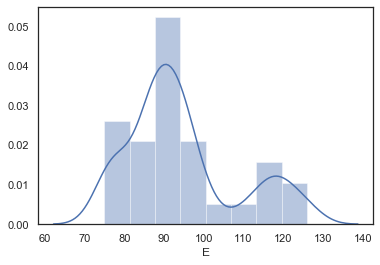

In [28]:
for i in ds_base.columns:
    plt.figure()
    sns.distplot(ds_base[i])

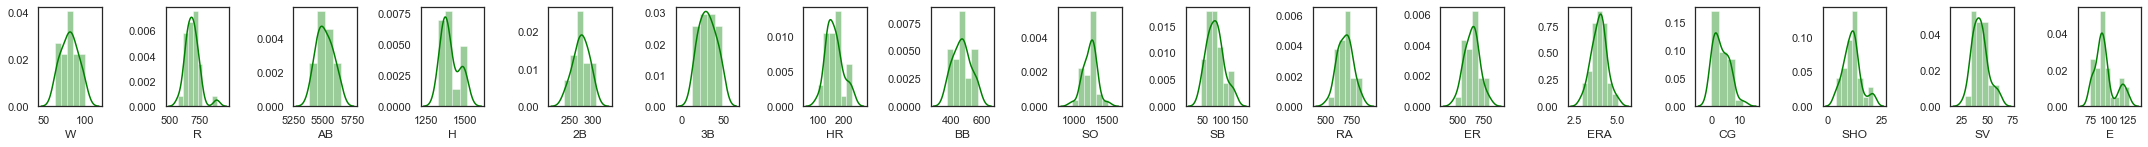

In [29]:
plt.figure(figsize=(30,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(ds_base[collist[i]],color="green")
    plt.tight_layout()

In [30]:
ds_base.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [31]:
for i in ds_base.columns:
    if ds_base[i].skew()>.55:
        ds_base[i]=np.log1p(ds_base[i])

In [32]:
ds_base.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

### Removing Outliers

In [33]:
from scipy.stats import zscore
z=np.abs(zscore(ds_base))
threshold=3
print(np.where(z>3))
ds_base_new=ds_base[(z<3).all(axis=1)]
print(ds_base.shape)
print(ds_base_new.shape)

(array([5], dtype=int64), array([1], dtype=int64))
(30, 17)
(29, 17)


### Model Training

In [34]:
ds_base_new_x=ds_base_new.drop(columns="W")
y=pd.DataFrame(ds_base_new["W"])

### Scaling Data

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_base_new)
x=pd.DataFrame(x,columns=ds_base_new.columns)
x

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.416025,0.952719,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.240415,-0.722413,1.554812,-0.435733
1,0.239947,0.356659,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.240415,0.312085,0.296229,-0.598110
2,0.043934,-0.241239,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,1.815711,-0.157879,-0.672787,-1.197382
3,-0.446099,-1.341932,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.214333,-0.426009,-0.825263,0.538291
4,-0.642112,0.203902,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.214333,0.312085,-1.142637,-0.598110
5,0.631973,1.765462,0.716535,-0.051906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.186270,-2.375997,0.667088,-0.045239
6,0.043934,0.721344,-0.447345,-0.553131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.869855,-0.157879,0.035297,-1.378259
7,-0.054073,-0.816734,-0.447345,-0.310580,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.841793,0.312085,1.952930,0.105172
8,-0.250086,1.445583,1.752672,1.689389,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.186270,-0.157879,-0.379227,0.252482
9,0.729980,1.506078,-0.078310,0.349394,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.787648,-0.426009,0.296229,1.699369


### Spliting Training and Testing

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23, 17)
(6, 17)
(23, 1)
(6, 1)


### Importing Algorithims and Metrices

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [41]:
models=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor()]
for m in models:
    m.fit(x_train,y_train)
    print("Score of",m,"is:",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Error:")
    print("Mean Absolute Error:",mean_absolute_error(y_test,predm))
    print("Mean Squared Error:",mean_squared_error(y_test,predm))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predm)))
    print('R2 Score is:',r2_score(y_test,predm))
    print("**************************************************************************************************")
    print("\n")

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 1.0
Error:
Mean Absolute Error: 4.736951571734001e-15
Mean Squared Error: 6.731613057885967e-29
Root Mean Squared Error: 8.204640795236539e-15
R2 Score is: 1.0
**************************************************************************************************


Score of Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) is: 0.9907409071220035
Error:
Mean Absolute Error: 0.8241810227293224
Mean Squared Error: 0.8964400514248748
Root Mean Squared Error: 0.9468051813466564
R2 Score is: 0.9906943939298456
**************************************************************************************************


Score of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) is: 0.992283

### GridSearch

In [42]:
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1],"random_state":range(42,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001, 'random_state': 42}

### Using Best Parameter in Ridge

In [44]:
ridge=Ridge(alpha=1,random_state=42)
ridge.fit(x_train,y_train)
print("Score",ridge.score(x_train,y_train))
predm=ridge.predict(x_test)
print("\n")
print("Mean Absolute Error:",mean_absolute_error(y_test,predm))
print("Mean Squared Error:",mean_squared_error(y_test,predm))
print("Root_Mean_Squard _Error:",np.sqrt(mean_squared_error(y_test,predm)))
print("\n")
print("r2_score:",r2_score(y_test,predm))

Score 0.9922833790342903


Mean Absolute Error: 1.41223240177271
Mean Squared Error: 3.590268821970305
Root_Mean_Squard _Error: 1.8948004702264314


r2_score: 0.9627307734743566


### Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(ridge,x,y,cv=4,scoring="r2")
print("Score:",score)
print("Mean Score:",score.mean())
print("Standard Deviation",score.std())

Score: [0.84735292 0.9114169  0.9779008  0.98394825]
Mean Score: 0.9301547198659916
Standard Deviation 0.05563424263719026
